# Library and Data Imports and Standardization

In [1]:
# Make the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer, r2_score, root_mean_squared_error

# Import train test split
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from pprint import pprint

# Import Decision Tree Regressor and Classifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

# Import Random Forest Regressor and Classifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Import time
import time

# Import Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

# Import confusion matrix
from sklearn.metrics import confusion_matrix

# Import kfold
from sklearn.model_selection import KFold

# Import cross val score
from sklearn.model_selection import cross_val_score

# Import math
import math

# Import log2
from math import log2

# Import classification report
from sklearn.metrics import classification_report

np.random.seed(42)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/'
convabuse_filename = 'convabuse_final.csv'
dghs_filename = 'dynamically_generated_hate_speech_dataset_final.csv'
oaa_filename = 'online_abusive_attacks_final.csv'
us2020hs_filename = 'us_elections_2020_hate_speech_final.csv'
mlma_hate_speech_filename = 'MLMA_hate_speech_final.csv'

In [3]:
# Import the datasets
convabuse = pd.read_csv(f'{path}{convabuse_filename}')
dynamically_generated_hate_speech = pd.read_csv(f'{path}{dghs_filename}')
online_abusive_attacks = pd.read_csv(f'{path}{oaa_filename}')
us_elections_2020_hate_speech = pd.read_csv(f'{path}{us2020hs_filename}')
mlma_hate_speech = pd.read_csv(f'{path}{mlma_hate_speech_filename}')
mlma_hate_speech_sample = mlma_hate_speech.sample(frac=0.3, random_state=42)

In [4]:
convabuse.head()

,race_or_ethnicity,gender,religion,lgbtq,nationality,age,disability,class,none,abuse_level
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [5]:
convabuse_X = convabuse.drop("abuse_level", axis=1)
convabuse_y = convabuse["abuse_level"]

In [6]:
dynamically_generated_hate_speech.head()

,label,type,race_or_ethnicity,gender,religion,lgbtq,nationality,age,disability,class,none,original
0,1.0,-1,0,0,0,1,0,0,0,0,0,0
1,1.0,-1,0,0,0,0,0,0,0,0,0,1
2,1.0,-1,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0,0,0,0,0,0,0,0,1,1
4,1.0,-1,0,0,0,0,0,0,0,0,0,1


In [7]:
dghs_X = dynamically_generated_hate_speech.drop("label", axis=1)
dghs_y = dynamically_generated_hate_speech["label"]

In [8]:
online_abusive_attacks.head()

,verified,high Identity_Attack,high Insult,high Profanity,high Threat,high other attr,Toxicity
0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2.0,0.0,10.0,0.0,0.0,1.0
2,0,17.0,1.0,25.0,1.0,0.0,1.0
3,0,9.0,2.0,33.0,2.0,0.0,3.0
4,0,0.0,0.0,7.0,0.0,0.0,0.0


In [9]:
online_abusive_attacks_X = online_abusive_attacks.drop("Toxicity", axis=1)
online_abusive_attacks_y = online_abusive_attacks["Toxicity"]

In [10]:
us_elections_2020_hate_speech.head()

,Trump,Biden,HOF
0,1.0,4.0,1
1,4.0,0.0,1
2,0.0,1.0,1
3,1.0,4.0,1
4,4.0,1.0,1


In [11]:
us2020hs_X = us_elections_2020_hate_speech.drop("HOF", axis=1)
us2020hs_y = us_elections_2020_hate_speech["HOF"]

In [12]:
mlma_hate_speech.head()

,index,directness,shock_annotator_sentiment,anger_annotator_sentiment,confusion_annotator_sentiment,sadness_annotator_sentiment,indifference_annotator_sentiment,disgust_annotator_sentiment,fear_annotator_sentiment,race_or_ethnicity,gender,religion,lgbtq,nationality,age,disability,class,none,abuse_level
0,7463,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,883,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0
2,5524,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,5323,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,12290,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
mlma_hate_speech_X = mlma_hate_speech.drop("abuse_level", axis=1)
mlma_hate_speech_y = mlma_hate_speech["abuse_level"]
mlma_hate_speech_X_sample = mlma_hate_speech_sample.drop("abuse_level", axis=1)
mlma_hate_speech_y_sample = mlma_hate_speech_sample["abuse_level"]

In [14]:
# Implement KFold
convabuse_kf = KFold(n_splits=5, shuffle=True, random_state=42)
dghs_kf = KFold(n_splits=5, shuffle=True, random_state=42)
online_abusive_attacks_kf = KFold(n_splits=5, shuffle=True, random_state=42)
us2020hs_kf = KFold(n_splits=5, shuffle=True, random_state=42)
mlma_hate_speech_kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Linear Modeling

In [15]:
# Get only the numeric features for each dataset
convabuse_X_numeric = convabuse_X.select_dtypes(include=np.number)
dghs_X_numeric = dghs_X.select_dtypes(include=np.number)
online_abusive_attacks_X_numeric = online_abusive_attacks_X.select_dtypes(include=np.number)
us2020hs_X_numeric = us2020hs_X.select_dtypes(include=np.number)
mlma_hate_speech_X_numeric = mlma_hate_speech_X.select_dtypes(include=np.number)
mlma_hate_speech_X_numeric_sample = mlma_hate_speech_X_sample.select_dtypes(include=np.number)

In [16]:
# Use standard scaler on the Convabuse X data
convabuse_scaler = StandardScaler()
convabuse_X_scaled = convabuse_scaler.fit_transform(convabuse_X_numeric)
convabuse_X_scaled = pd.DataFrame(convabuse_X_scaled, columns=convabuse_X_numeric.columns)

In [17]:
# Use standard scaler on the Dynamically Generated Hate Speech X data
dghs_scaler = StandardScaler()
dghs_X_scaled = dghs_scaler.fit_transform(dghs_X_numeric)
dghs_X_scaled = pd.DataFrame(dghs_X_scaled, columns=dghs_X_numeric.columns)

In [18]:
# Use standard scaler on the online abusive attacks X data
oaa_scaler = StandardScaler()
online_abusive_attacks_X_scaled = oaa_scaler.fit_transform(online_abusive_attacks_X_numeric)
online_abusive_attacks_X_scaled = pd.DataFrame(online_abusive_attacks_X_scaled, columns=online_abusive_attacks_X_numeric.columns)

In [19]:
# Use standard scaler on the US elections 2020 hate speech X data
us2020hs_scaler = StandardScaler()
us2020hs_X_scaled = us2020hs_scaler.fit_transform(us2020hs_X_numeric)
us2020hs_X_scaled = pd.DataFrame(us2020hs_X_scaled, columns=us2020hs_X_numeric.columns)

In [20]:
# Use standard scaler on the MLMA hate speech X data
mlma_hate_speech_scaler = StandardScaler()
mlma_hate_speech_X_scaled = mlma_hate_speech_scaler.fit_transform(mlma_hate_speech_X_numeric)
mlma_hate_speech_X_scaled = pd.DataFrame(mlma_hate_speech_X_scaled, columns=mlma_hate_speech_X_numeric.columns)

In [21]:
# Use standard scaler on the MLMA hate speech X sample data
mlma_hate_speech_sample_scaler = StandardScaler()
mlma_hate_speech_X_sample_scaled = mlma_hate_speech_sample_scaler.fit_transform(mlma_hate_speech_X_numeric_sample)
mlma_hate_speech_X_sample_scaled = pd.DataFrame(mlma_hate_speech_X_sample_scaled, columns=mlma_hate_speech_X_numeric_sample.columns)

In [22]:
for columns in [convabuse_X_numeric.columns, dghs_X_numeric.columns, online_abusive_attacks_X_numeric.columns, us2020hs_X_numeric.columns, mlma_hate_speech_X_numeric.columns]:
  print(columns)

Index(['race_or_ethnicity', 'gender', 'religion', 'lgbtq', 'nationality',
       'age', 'disability', 'class', 'none'],
      dtype='object')
Index(['type', 'race_or_ethnicity', 'gender', 'religion', 'lgbtq',
       'nationality', 'age', 'disability', 'class', 'none', 'original'],
      dtype='object')
Index(['verified', 'high Identity_Attack', 'high Insult', 'high Profanity',
       'high Threat', 'high other attr'],
      dtype='object')
Index(['Trump', 'Biden'], dtype='object')
Index(['index', 'directness', 'shock_annotator_sentiment',
       'anger_annotator_sentiment', 'confusion_annotator_sentiment',
       'sadness_annotator_sentiment', 'indifference_annotator_sentiment',
       'disgust_annotator_sentiment', 'fear_annotator_sentiment',
       'race_or_ethnicity', 'gender', 'religion', 'lgbtq', 'nationality',
       'age', 'disability', 'class', 'none'],
      dtype='object')


In [23]:
# Train test split for each dataset
convabuse_X_train, convabuse_X_test, convabuse_y_train, convabuse_y_test = train_test_split(convabuse_X_scaled, convabuse_y, test_size=0.2, random_state=42)
dghs_X_train, dghs_X_test, dghs_y_train, dghs_y_test = train_test_split(dghs_X_scaled, dghs_y, test_size=0.2, random_state=42)
online_abusive_attacks_X_train, online_abusive_attacks_X_test, online_abusive_attacks_y_train, online_abusive_attacks_y_test = train_test_split(online_abusive_attacks_X_scaled, online_abusive_attacks_y, test_size=0.2, random_state=42)
us2020hs_X_train, us2020hs_X_test, us2020hs_y_train, us2020hs_y_test = train_test_split(us2020hs_X_scaled, us2020hs_y, test_size=0.2, random_state=42)
mlma_hate_speech_X_train, mlma_hate_speech_X_test, mlma_hate_speech_y_train, mlma_hate_speech_y_test = train_test_split(mlma_hate_speech_X_scaled, mlma_hate_speech_y, test_size=0.2, random_state=42)
mlma_hate_speech_X_train_sample, mlma_hate_speech_X_test_sample, mlma_hate_speech_y_train_sample, mlma_hate_speech_y_test_sample = train_test_split(mlma_hate_speech_X_sample_scaled, mlma_hate_speech_y_sample, test_size=0.2, random_state=42)

In [24]:
# Get the length of each dataset
convabuse_length = len(convabuse_X_train)
dghs_length = len(dghs_X_train)
online_abusive_attacks_length = len(online_abusive_attacks_X_train)
us2020hs_length = len(us2020hs_X_train)
mlma_hate_speech_length = len(mlma_hate_speech_X_train)
mlma_hate_speech_sample_length = len(mlma_hate_speech_X_train_sample)

In [25]:
convabuse_log2 = math.ceil(log2(convabuse_length))
convabuse_1_percent = math.ceil(convabuse_length * 0.01)
convabuse_length, convabuse_log2, convabuse_1_percent

(40272, 16, 403)

In [26]:
dghs_log2 = math.ceil(log2(dghs_length))
dghs_1_percent = math.ceil(dghs_length * 0.01)
dghs_length, dghs_log2, dghs_1_percent

(30350, 15, 304)

In [27]:
online_abusive_attacks_log2 = math.ceil(log2(online_abusive_attacks_length))
online_abusive_attacks_1_percent = math.ceil(online_abusive_attacks_length * 0.01)
online_abusive_attacks_length, online_abusive_attacks_log2, online_abusive_attacks_1_percent

(1892, 11, 19)

In [28]:
us2020hs_log2 = math.ceil(log2(us2020hs_length))
us2020hs_1_percent = math.ceil(us2020hs_length * 0.01)
us2020hs_length, us2020hs_log2, us2020hs_1_percent

(4236, 13, 43)

In [29]:
mlma_hate_speech_log2 = math.ceil(log2(mlma_hate_speech_length))
mlma_hate_speech_1_percent = math.ceil(mlma_hate_speech_length * 0.01)
mlma_hate_speech_length, mlma_hate_speech_log2, mlma_hate_speech_1_percent

(42684, 16, 427)

In [30]:
mlma_hate_speech_sample_log2 = math.ceil(log2(mlma_hate_speech_sample_length))
mlma_hate_speech_sample_1_percent = math.ceil(mlma_hate_speech_sample_length * 0.01)
mlma_hate_speech_sample_length, mlma_hate_speech_sample_log2, mlma_hate_speech_sample_1_percent

(12805, 14, 129)

In [31]:
dt_regression_results_list = []

In [32]:
dt_classification_results_list = []

## Convabuse Decision Tree

In [33]:
convabuse_y_test.value_counts()

,count
abuse_level,
0,2067
2,2058
3,2000
1,1972
4,1971


In [34]:
# Decision Tree Classifier pipeline for Convabuse dataset
convabuse_dt_pipeline = Pipeline([
    ('dt_classifier', DecisionTreeClassifier(random_state=42))
])

# Set the parameters for Randomized Search for Decision Tree Classifier on the Convabuse dataset
convabuse_dt_param_grid = {
    'dt_classifier__max_depth': range(1, convabuse_log2),
    'dt_classifier__min_samples_split': [convabuse_1_percent * i for i in range(2, 6)],
    'dt_classifier__min_samples_leaf': [convabuse_1_percent * i for i in range(1, 6)],
    'dt_classifier__criterion': ['gini', 'entropy']
}

In [35]:
start_time = time.time()
convabuse_class_scorer = make_scorer(accuracy_score, greater_is_better=True)

convabuse_dt_random_search = RandomizedSearchCV(convabuse_dt_pipeline,
                                                   param_distributions=convabuse_dt_param_grid,
                                                   n_iter=10,
                                                   cv=convabuse_kf,
                                                   scoring=convabuse_class_scorer,
                                                   random_state=42)
convabuse_dt_random_search.fit(convabuse_X_train, convabuse_y_train)
end_time = time.time()
print("Best parameters for Convabuse Decision Tree Classifier:", convabuse_dt_random_search.best_params_)
print("Best score for Convabuse Decision Tree Classifier:", convabuse_dt_random_search.best_score_)
print("Time taken for Convabuse Decision Tree Classifier Randomized Search:", end_time - start_time)

Best parameters for Convabuse Decision Tree Classifier: {'dt_classifier__min_samples_split': 1612, 'dt_classifier__min_samples_leaf': 1209, 'dt_classifier__max_depth': 6, 'dt_classifier__criterion': 'gini'}
Best score for Convabuse Decision Tree Classifier: 0.33800163915297377
Time taken for Convabuse Decision Tree Classifier Randomized Search: 1.10038161277771


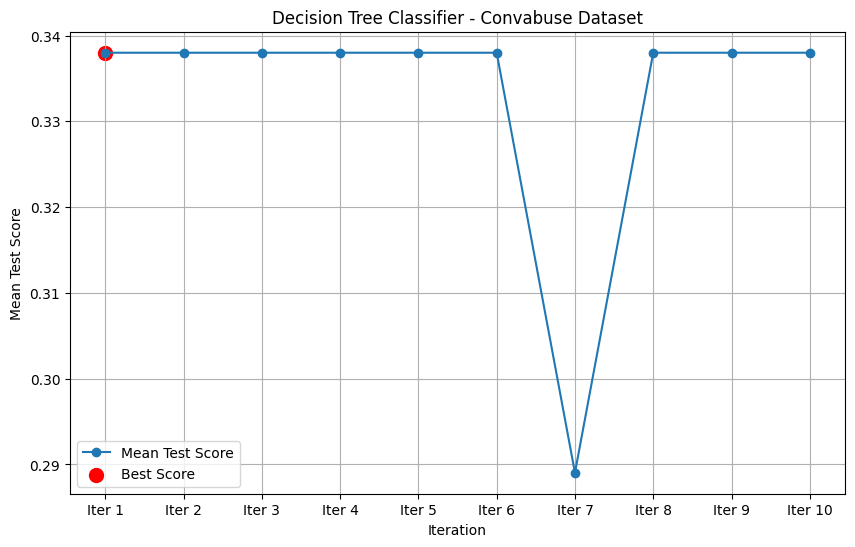

In [36]:
# Plot the accuracy scores for the Decision Tree Classifier on the US Accidents dataset for all iterations
plt.figure(figsize=(10, 6))
plt.plot(convabuse_dt_random_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot the best score as a red x
convabuse_dt_best_score_index = np.argmax(convabuse_dt_random_search.cv_results_['mean_test_score'])
plt.scatter(convabuse_dt_best_score_index, convabuse_dt_random_search.cv_results_['mean_test_score'][convabuse_dt_best_score_index], color='red', s=100, label='Best Score')

plt.title('Decision Tree Classifier - Convabuse Dataset')
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score')
plt.xticks(range(len(convabuse_dt_random_search.cv_results_['mean_test_score'])),
           [f"Iter {i+1}" for i in range(len(convabuse_dt_random_search.cv_results_['mean_test_score']))])
plt.legend()
plt.grid()
plt.show()

In [37]:
# Predict on the test set
convabuse_dt_y_pred = convabuse_dt_random_search.predict(convabuse_X_test)

In [38]:
# Evaluate the model
convabuse_dt_accuracy = accuracy_score(convabuse_y_test, convabuse_dt_y_pred)
convabuse_dt_f1 = f1_score(convabuse_y_test, convabuse_dt_y_pred, average='weighted')

print("Convabuse Decision Tree Classifier:")
print(f"Best Parameters: {convabuse_dt_random_search.best_params_}")
print(f"Accuracy: {convabuse_dt_accuracy:.4f}")
print(f"F1 Score: {convabuse_dt_f1:.4f}")

Convabuse Decision Tree Classifier:
Best Parameters: {'dt_classifier__min_samples_split': 1612, 'dt_classifier__min_samples_leaf': 1209, 'dt_classifier__max_depth': 6, 'dt_classifier__criterion': 'gini'}
Accuracy: 0.3315
F1 Score: 0.2368


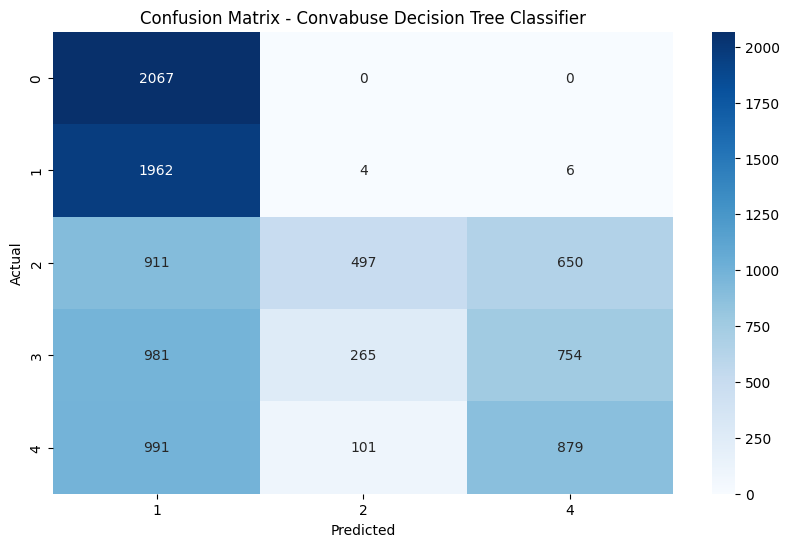

In [39]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(convabuse_y_test, convabuse_dt_y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Convabuse Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [40]:
# Generate a classification report for the Decision Tree Classifier on the Convabuse dataset
convabuse_dt_report = classification_report(convabuse_y_test, convabuse_dt_y_pred)
print("Classification Report for Convabuse Decision Tree Classifier:")
print(convabuse_dt_report)

Classification Report for Convabuse Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2067
           1       0.28      0.99      0.44      1972
           2       0.57      0.24      0.34      2058
           3       0.00      0.00      0.00      2000
           4       0.38      0.45      0.41      1971

    accuracy                           0.33     10068
   macro avg       0.25      0.34      0.24     10068
weighted avg       0.25      0.33      0.24     10068



In [41]:
# Append details to the results list
dt_classification_results_list.append((
    "Decision Tree",
    "Convabuse",
    "NA",
    "NA",
    convabuse_dt_accuracy,
    convabuse_dt_f1,
    0.0,
    convabuse_dt_random_search.best_params_
))

## Dynamically Generated Hate Speech Decision Tree

In [42]:
dghs_y_test.value_counts()

,count
label,
1.0,3800
0.0,3788


In [43]:
# Decision Tree Classifier pipeline for DGHS dataset
dghs_dt_pipeline = Pipeline([
    ('dt_classifier', DecisionTreeClassifier(random_state=42))
])

# Set the parameters for Randomized Search for Decision Tree Classifier on the DGHS dataset
dghs_dt_param_grid = {
    'dt_classifier__max_depth': [dghs_log2],
    'dt_classifier__min_samples_split': [dghs_1_percent * i for i in range(2, 6)],
    'dt_classifier__min_samples_leaf': [dghs_1_percent * i for i in range(1, 6)],
    'dt_classifier__criterion': ['gini', 'entropy']
}

In [44]:
start_time = time.time()
dghs_class_scorer = make_scorer(accuracy_score, greater_is_better=True)

dghs_dt_random_search = RandomizedSearchCV(dghs_dt_pipeline,
                                                   param_distributions=dghs_dt_param_grid,
                                                   n_iter=10,
                                                   cv=dghs_kf,
                                                   scoring=dghs_class_scorer,
                                                   random_state=42)
dghs_dt_random_search.fit(dghs_X_train, dghs_y_train)
end_time = time.time()
print("Best parameters for Dynamically Generated Hate Speech Decision Tree Classifier:", dghs_dt_random_search.best_params_)
print("Best score for Dynamically Generated Hate Speech Decision Tree Classifier:", dghs_dt_random_search.best_score_)
print("Time taken for Dynamically Generated Hate Speech Decision Tree Classifier Randomized Search:", end_time - start_time)

Best parameters for Dynamically Generated Hate Speech Decision Tree Classifier: {'dt_classifier__min_samples_split': 1520, 'dt_classifier__min_samples_leaf': 1520, 'dt_classifier__max_depth': 15, 'dt_classifier__criterion': 'gini'}
Best score for Dynamically Generated Hate Speech Decision Tree Classifier: 0.8376606260296541
Time taken for Dynamically Generated Hate Speech Decision Tree Classifier Randomized Search: 1.0538978576660156


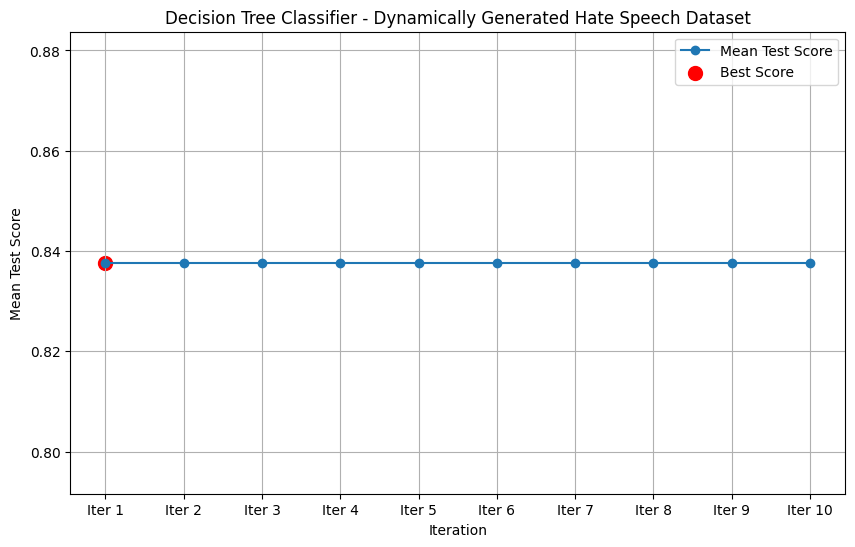

In [45]:
# Plot the accuracy scores for the Decision Tree Classifier on the US Accidents dataset for all iterations
plt.figure(figsize=(10, 6))
plt.plot(dghs_dt_random_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot the best score as a red x
dghs_dt_best_score_index = np.argmax(dghs_dt_random_search.cv_results_['mean_test_score'])
plt.scatter(dghs_dt_best_score_index, dghs_dt_random_search.cv_results_['mean_test_score'][dghs_dt_best_score_index], color='red', s=100, label='Best Score')

plt.title('Decision Tree Classifier - Dynamically Generated Hate Speech Dataset')
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score')
plt.xticks(range(len(dghs_dt_random_search.cv_results_['mean_test_score'])),
           [f"Iter {i+1}" for i in range(len(dghs_dt_random_search.cv_results_['mean_test_score']))])
plt.legend()
plt.grid()
plt.show()

In [46]:
# Predict on the test set
dghs_dt_y_pred = dghs_dt_random_search.predict(dghs_X_test)

In [47]:
# Evaluate the model
dghs_dt_accuracy = accuracy_score(dghs_y_test, dghs_dt_y_pred)
dghs_dt_f1 = f1_score(dghs_y_test, dghs_dt_y_pred, average='weighted')

print("Dynamically Generated Hate Speech Decision Tree Classifier:")
print(f"Best Parameters: {dghs_dt_random_search.best_params_}")
print(f"Accuracy: {dghs_dt_accuracy:.4f}")
print(f"F1 Score: {dghs_dt_f1:.4f}")

Dynamically Generated Hate Speech Decision Tree Classifier:
Best Parameters: {'dt_classifier__min_samples_split': 1520, 'dt_classifier__min_samples_leaf': 1520, 'dt_classifier__max_depth': 15, 'dt_classifier__criterion': 'gini'}
Accuracy: 0.8349
F1 Score: 0.8303


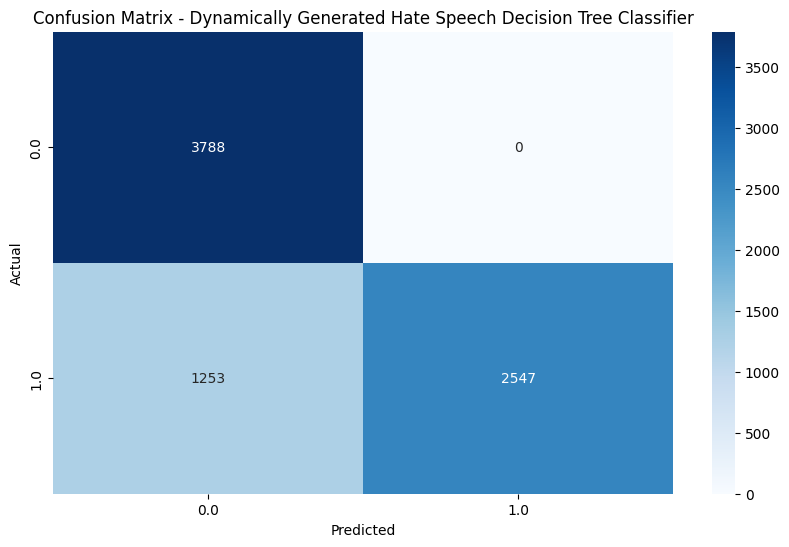

In [48]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(dghs_y_test, dghs_dt_y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Dynamically Generated Hate Speech Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [49]:
# Generate a classification report for the Decision Tree Classifier on the Dynamically Generated Hate Speech dataset
dghs_dt_report = classification_report(dghs_y_test, dghs_dt_y_pred)
print("Classification Report for Dynamically Generated Hate Speech Decision Tree Classifier:")
print(dghs_dt_report)

Classification Report for Dynamically Generated Hate Speech Decision Tree Classifier:
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      3788
         1.0       1.00      0.67      0.80      3800

    accuracy                           0.83      7588
   macro avg       0.88      0.84      0.83      7588
weighted avg       0.88      0.83      0.83      7588



In [50]:
# Append details to the results list
dt_classification_results_list.append((
    "Decision Tree",
    "Dynamically Generated Hate Speech",
    "NA",
    "NA",
    dghs_dt_accuracy,
    dghs_dt_f1,
    0.0,
    dghs_dt_random_search.best_params_
))

In [51]:
online_abusive_attacks_y_test.value_counts()

,count
Toxicity,
0.0,437
1.0,14
2.0,6
3.0,4
10.0,1
7.0,1
45.0,1
18.0,1
5.0,1


In [52]:
# Decision Tree Regressor pipeline for online_abusive_attacks dataset
online_abusive_attacks_dt_pipeline = Pipeline([
    ('dt_regressor', DecisionTreeRegressor(random_state=42))
])

# Set the parameters for Randomized Search for Decision Tree Regressor on the online_abusive_attacks dataset
online_abusive_attacks_dt_param_grid = {
    'dt_regressor__max_depth': [online_abusive_attacks_log2],
    'dt_regressor__min_samples_split': [online_abusive_attacks_1_percent * i for i in range(2, 6)],
    'dt_regressor__min_samples_leaf': [online_abusive_attacks_1_percent * i for i in range(1, 6)],
    'dt_regressor__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
}

In [53]:
start_time = time.time()
online_abusive_attacks_r2_scorer = make_scorer(r2_score, greater_is_better=True)

online_abusive_attacks_dt_random_search = RandomizedSearchCV(online_abusive_attacks_dt_pipeline,
                                                   param_distributions=online_abusive_attacks_dt_param_grid,
                                                   n_iter=10,
                                                   cv=online_abusive_attacks_kf,
                                                   scoring=online_abusive_attacks_r2_scorer,
                                                   random_state=42)
online_abusive_attacks_dt_random_search.fit(online_abusive_attacks_X_train, online_abusive_attacks_y_train)
end_time = time.time()
print("Best parameters for Online Abusive Attacks Decision Tree Regressor:", online_abusive_attacks_dt_random_search.best_params_)
print("Best score for Online Abusive Attacks Decision Tree Regressor:", online_abusive_attacks_dt_random_search.best_score_)
print("Time taken for Online Abusive Attacks Decision Tree Regressor Randomized Search:", end_time - start_time)

Best parameters for Online Abusive Attacks Decision Tree Regressor: {'dt_regressor__min_samples_split': 38, 'dt_regressor__min_samples_leaf': 19, 'dt_regressor__max_depth': 11, 'dt_regressor__criterion': 'squared_error'}
Best score for Online Abusive Attacks Decision Tree Regressor: 0.6090498787970808
Time taken for Online Abusive Attacks Decision Tree Regressor Randomized Search: 7.550107002258301


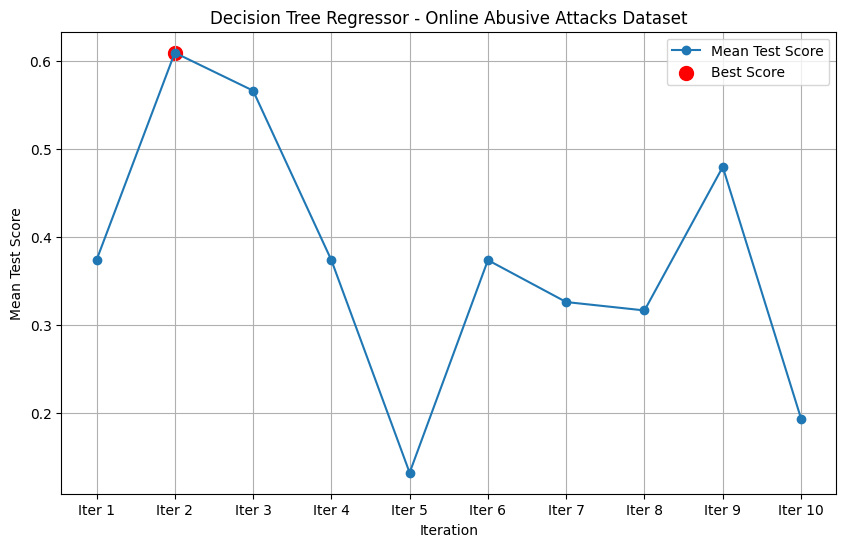

In [54]:
# Plot the accuracy scores for the Decision Tree Regressor on the Online Abusive Attacks dataset for all iterations
plt.figure(figsize=(10, 6))
plt.plot(online_abusive_attacks_dt_random_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot the best score as a red x
online_abusive_attacks_dt_best_score_index = np.argmax(online_abusive_attacks_dt_random_search.cv_results_['mean_test_score'])
plt.scatter(online_abusive_attacks_dt_best_score_index, online_abusive_attacks_dt_random_search.cv_results_['mean_test_score'][online_abusive_attacks_dt_best_score_index], color='red', s=100, label='Best Score')

plt.title('Decision Tree Regressor - Online Abusive Attacks Dataset')
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score')
plt.xticks(range(len(online_abusive_attacks_dt_random_search.cv_results_['mean_test_score'])),
           [f"Iter {i+1}" for i in range(len(online_abusive_attacks_dt_random_search.cv_results_['mean_test_score']))])
plt.legend()
plt.grid()
plt.show()

In [55]:
# Predict on the test set
online_abusive_attacks_dt_y_pred = online_abusive_attacks_dt_random_search.predict(online_abusive_attacks_X_test)

In [56]:
# Evaluate the model
online_abusive_attacks_dt_r2 = r2_score(online_abusive_attacks_y_test, online_abusive_attacks_dt_y_pred)
online_abusive_attacks_dt_rmse = root_mean_squared_error(online_abusive_attacks_y_test, online_abusive_attacks_dt_y_pred)

print("Dynamically Generated Hate Speech Decision Tree Regressor:")
print(f"Best Parameters: {online_abusive_attacks_dt_random_search.best_params_}")
print(f"R-squared Score: {online_abusive_attacks_dt_r2:.4f}")
print(f"RMSE Score: {online_abusive_attacks_dt_rmse:.4f}")

Dynamically Generated Hate Speech Decision Tree Regressor:
Best Parameters: {'dt_regressor__min_samples_split': 38, 'dt_regressor__min_samples_leaf': 19, 'dt_regressor__max_depth': 11, 'dt_regressor__criterion': 'squared_error'}
R-squared Score: 0.3991
RMSE Score: 11.9551


In [57]:
# Append details to the results list
dt_regression_results_list.append((
    "Decision Tree",
    "Online Abusive Attacks",
    online_abusive_attacks_dt_rmse,
    online_abusive_attacks_dt_r2,
    online_abusive_attacks_dt_random_search.best_params_
))

In [58]:
us2020hs_y_test.value_counts()

,count
HOF,
1,545
0,515


In [59]:
# Decision Tree Classifier pipeline for us2020hs dataset
us2020hs_dt_pipeline = Pipeline([
    ('dt_classifier', DecisionTreeClassifier(random_state=42))
])

# Set the parameters for Randomized Search for Decision Tree Classifier on the us2020hs dataset
us2020hs_dt_param_grid = {
    'dt_classifier__max_depth': [us2020hs_log2],
    'dt_classifier__min_samples_split': [us2020hs_1_percent * i for i in range(2, 6)],
    'dt_classifier__min_samples_leaf': [us2020hs_1_percent * i for i in range(1, 6)],
    'dt_classifier__criterion': ['gini', 'entropy']
}

In [60]:
start_time = time.time()
us2020hs_class_scorer = make_scorer(accuracy_score, greater_is_better=True)

us2020hs_dt_random_search = RandomizedSearchCV(us2020hs_dt_pipeline,
                                                   param_distributions=us2020hs_dt_param_grid,
                                                   n_iter=10,
                                                   cv=us2020hs_kf,
                                                   scoring=us2020hs_class_scorer,
                                                   random_state=42)
us2020hs_dt_random_search.fit(us2020hs_X_train, us2020hs_y_train)
end_time = time.time()
print("Best parameters for US Elections 2020 Hate Speech Decision Tree Classifier:", us2020hs_dt_random_search.best_params_)
print("Best score for US Elections 2020 Hate Speech Decision Tree Classifier:", us2020hs_dt_random_search.best_score_)
print("Time taken for US Elections 2020 Hate Speech Decision Tree Classifier Randomized Search:", end_time - start_time)

Best parameters for US Elections 2020 Hate Speech Decision Tree Classifier: {'dt_classifier__min_samples_split': 172, 'dt_classifier__min_samples_leaf': 86, 'dt_classifier__max_depth': 13, 'dt_classifier__criterion': 'entropy'}
Best score for US Elections 2020 Hate Speech Decision Tree Classifier: 0.6794187587712459
Time taken for US Elections 2020 Hate Speech Decision Tree Classifier Randomized Search: 0.367443323135376


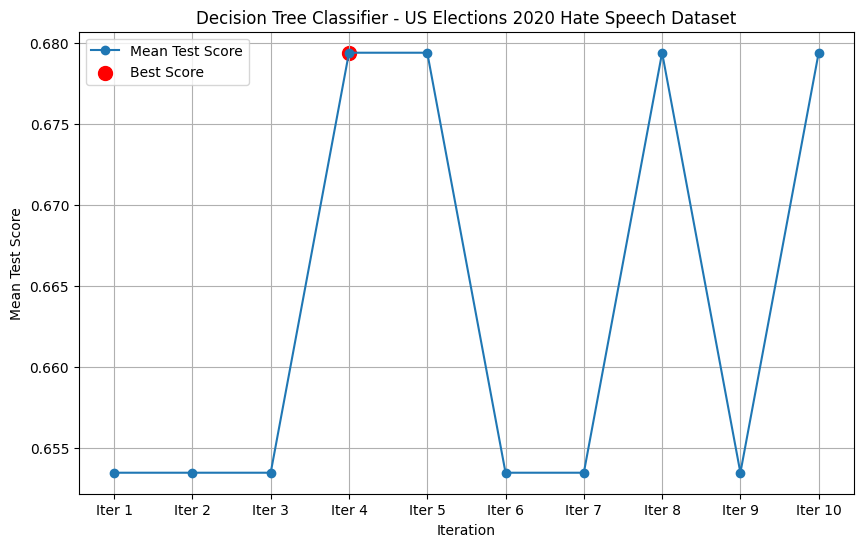

In [61]:
# Plot the accuracy scores for the Decision Tree Classifier on the US Elections 2020 Hate Speech dataset for all iterations
plt.figure(figsize=(10, 6))
plt.plot(us2020hs_dt_random_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot the best score as a red x
us2020hs_dt_best_score_index = np.argmax(us2020hs_dt_random_search.cv_results_['mean_test_score'])
plt.scatter(us2020hs_dt_best_score_index, us2020hs_dt_random_search.cv_results_['mean_test_score'][us2020hs_dt_best_score_index], color='red', s=100, label='Best Score')

plt.title('Decision Tree Classifier - US Elections 2020 Hate Speech Dataset')
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score')
plt.xticks(range(len(us2020hs_dt_random_search.cv_results_['mean_test_score'])),
           [f"Iter {i+1}" for i in range(len(us2020hs_dt_random_search.cv_results_['mean_test_score']))])
plt.legend()
plt.grid()
plt.show()

In [62]:
# Predict on the test set
us2020hs_dt_y_pred = us2020hs_dt_random_search.predict(us2020hs_X_test)

In [63]:
# Evaluate the model
us2020hs_dt_accuracy = accuracy_score(us2020hs_y_test, us2020hs_dt_y_pred)
us2020hs_dt_f1 = f1_score(us2020hs_y_test, us2020hs_dt_y_pred, average='weighted')

print("US Elections 2020 Hate Speech Decision Tree Classifier:")
print(f"Best Parameters: {us2020hs_dt_random_search.best_params_}")
print(f"Accuracy: {us2020hs_dt_accuracy:.4f}")
print(f"F1 Score: {us2020hs_dt_f1:.4f}")

US Elections 2020 Hate Speech Decision Tree Classifier:
Best Parameters: {'dt_classifier__min_samples_split': 172, 'dt_classifier__min_samples_leaf': 86, 'dt_classifier__max_depth': 13, 'dt_classifier__criterion': 'entropy'}
Accuracy: 0.6698
F1 Score: 0.6690


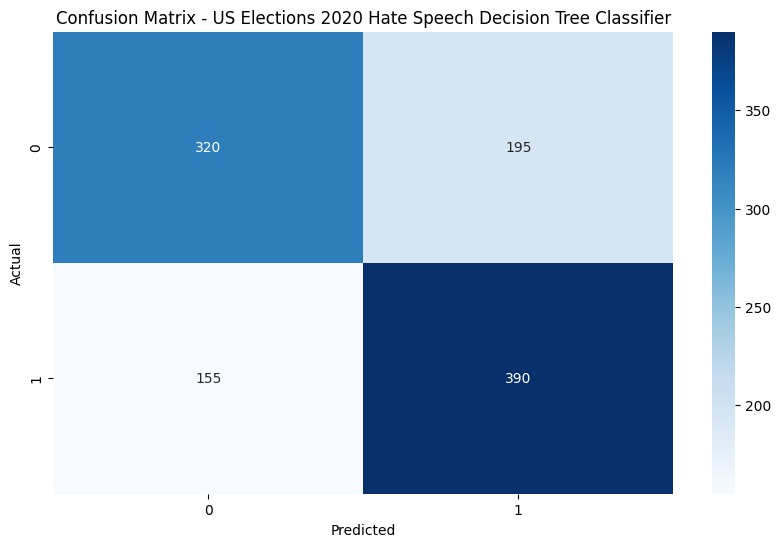

In [64]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(us2020hs_y_test, us2020hs_dt_y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - US Elections 2020 Hate Speech Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [65]:
# Generate a classification report for the Decision Tree Classifier on the US Elections 2020 Hate Speech
us2020hs_dt_report = classification_report(us2020hs_y_test, us2020hs_dt_y_pred)
print("Classification Report for US Elections 2020 Hate Speech Decision Tree Classifier:")
print(us2020hs_dt_report)

Classification Report for US Elections 2020 Hate Speech Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.67      0.62      0.65       515
           1       0.67      0.72      0.69       545

    accuracy                           0.67      1060
   macro avg       0.67      0.67      0.67      1060
weighted avg       0.67      0.67      0.67      1060



In [66]:
# Append details to the results list
dt_classification_results_list.append((
    "Decision Tree",
    "US Elections 2020 Hate Speech",
    "NA",
    "NA",
    us2020hs_dt_accuracy,
    us2020hs_dt_f1,
    0.0,
    us2020hs_dt_random_search.best_params_
))

In [67]:
mlma_hate_speech_y_test.value_counts()

,count
abuse_level,
4,2695
0,2690
3,2680
2,2607


In [68]:
# Decision Tree Classifier pipeline for mlma_hate_speech dataset
mlma_hate_speech_dt_pipeline = Pipeline([
    ('dt_classifier', DecisionTreeClassifier(random_state=42))
])

# Set the parameters for Randomized Search for Decision Tree Classifier on the mlma_hate_speech dataset
mlma_hate_speech_dt_param_grid = {
    'dt_classifier__max_depth': [mlma_hate_speech_log2],
    'dt_classifier__min_samples_split': [mlma_hate_speech_1_percent * i for i in range(2, 6)],
    'dt_classifier__min_samples_leaf': [mlma_hate_speech_1_percent * i for i in range(1, 6)],
    'dt_classifier__criterion': ['gini', 'entropy']
}

In [69]:
start_time = time.time()
mlma_hate_speech_class_scorer = make_scorer(accuracy_score, greater_is_better=True)

mlma_hate_speech_dt_random_search = RandomizedSearchCV(mlma_hate_speech_dt_pipeline,
                                                   param_distributions=mlma_hate_speech_dt_param_grid,
                                                   n_iter=10,
                                                   cv=mlma_hate_speech_kf,
                                                   scoring=mlma_hate_speech_class_scorer,
                                                   random_state=42)
mlma_hate_speech_dt_random_search.fit(mlma_hate_speech_X_train, mlma_hate_speech_y_train)
end_time = time.time()
print("Best parameters for US Elections 2020 Hate Speech Decision Tree Classifier:", mlma_hate_speech_dt_random_search.best_params_)
print("Best score for US Elections 2020 Hate Speech Decision Tree Classifier:", mlma_hate_speech_dt_random_search.best_score_)
print("Time taken for US Elections 2020 Hate Speech Decision Tree Classifier Randomized Search:", end_time - start_time)

Best parameters for US Elections 2020 Hate Speech Decision Tree Classifier: {'dt_classifier__min_samples_split': 2135, 'dt_classifier__min_samples_leaf': 2135, 'dt_classifier__max_depth': 16, 'dt_classifier__criterion': 'gini'}
Best score for US Elections 2020 Hate Speech Decision Tree Classifier: 1.0
Time taken for US Elections 2020 Hate Speech Decision Tree Classifier Randomized Search: 2.9232587814331055


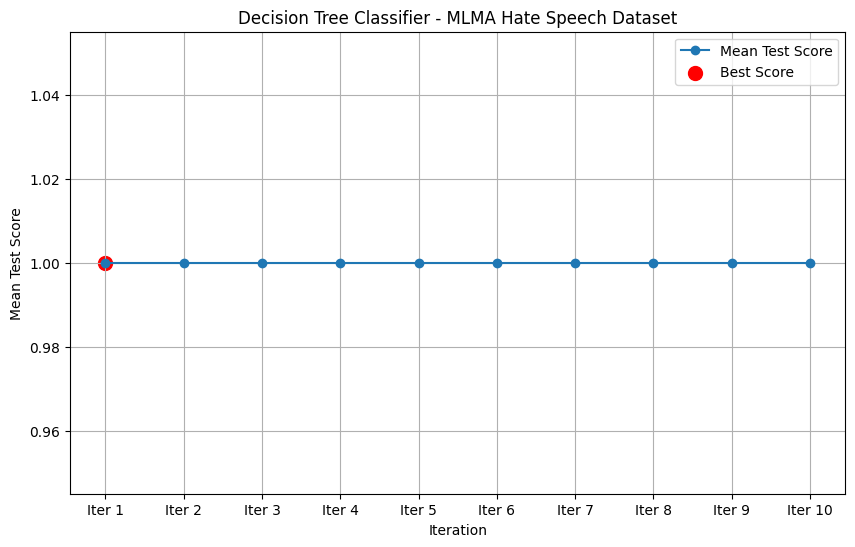

In [70]:
# Plot the accuracy scores for the Decision Tree Classifier on the MLMA Hate Speech dataset for all iterations
plt.figure(figsize=(10, 6))
plt.plot(mlma_hate_speech_dt_random_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot the best score as a red x
mlma_hate_speech_dt_best_score_index = np.argmax(mlma_hate_speech_dt_random_search.cv_results_['mean_test_score'])
plt.scatter(mlma_hate_speech_dt_best_score_index, mlma_hate_speech_dt_random_search.cv_results_['mean_test_score'][mlma_hate_speech_dt_best_score_index], color='red', s=100, label='Best Score')

plt.title('Decision Tree Classifier - MLMA Hate Speech Dataset')
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score')
plt.xticks(range(len(mlma_hate_speech_dt_random_search.cv_results_['mean_test_score'])),
           [f"Iter {i+1}" for i in range(len(mlma_hate_speech_dt_random_search.cv_results_['mean_test_score']))])
plt.legend()
plt.grid()
plt.show()

In [71]:
# Predict on the test set
mlma_hate_speech_dt_y_pred = mlma_hate_speech_dt_random_search.predict(mlma_hate_speech_X_test)

In [72]:
# Evaluate the model
mlma_hate_speech_dt_accuracy = accuracy_score(mlma_hate_speech_y_test, mlma_hate_speech_dt_y_pred)
mlma_hate_speech_dt_f1 = f1_score(mlma_hate_speech_y_test, mlma_hate_speech_dt_y_pred, average='weighted')

print("MLMA Hate Speech Decision Tree Classifier:")
print(f"Best Parameters: {mlma_hate_speech_dt_random_search.best_params_}")
print(f"Accuracy: {mlma_hate_speech_dt_accuracy:.4f}")
print(f"F1 Score: {mlma_hate_speech_dt_f1:.4f}")

MLMA Hate Speech Decision Tree Classifier:
Best Parameters: {'dt_classifier__min_samples_split': 2135, 'dt_classifier__min_samples_leaf': 2135, 'dt_classifier__max_depth': 16, 'dt_classifier__criterion': 'gini'}
Accuracy: 1.0000
F1 Score: 1.0000


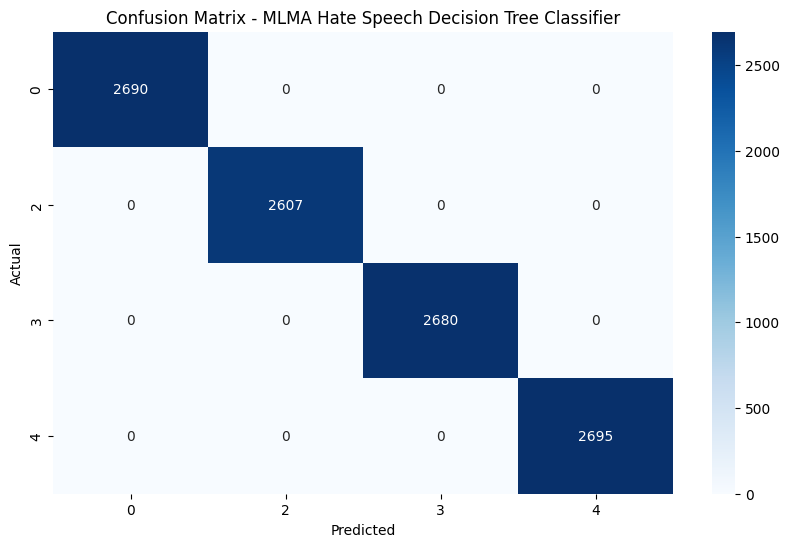

In [73]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(mlma_hate_speech_y_test, mlma_hate_speech_dt_y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - MLMA Hate Speech Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [74]:
# Generate a classification report for the Decision Tree Classifier on the US Elections 2020 Hate Speech
mlma_hate_speech_dt_report = classification_report(mlma_hate_speech_y_test, mlma_hate_speech_dt_y_pred)
print("Classification Report for MLMA Hate Speech Decision Tree Classifier:")
print(mlma_hate_speech_dt_report)

Classification Report for MLMA Hate Speech Decision Tree Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2690
           2       1.00      1.00      1.00      2607
           3       1.00      1.00      1.00      2680
           4       1.00      1.00      1.00      2695

    accuracy                           1.00     10672
   macro avg       1.00      1.00      1.00     10672
weighted avg       1.00      1.00      1.00     10672



In [75]:
# Append details to the results list
dt_classification_results_list.append((
    "Decision Tree",
    "MLMA Hate Speech",
    "NA",
    "NA",
    mlma_hate_speech_dt_accuracy,
    mlma_hate_speech_dt_f1,
    0.0,
    mlma_hate_speech_dt_random_search.best_params_
))

## Support Vector Machine Conclusions

In [76]:
dt_regression_results_list

[('Decision Tree',
  'Online Abusive Attacks',
  11.955131949815327,
  0.3991005898170088,
  {'dt_regressor__min_samples_split': 38,
   'dt_regressor__min_samples_leaf': 19,
   'dt_regressor__max_depth': 11,
   'dt_regressor__criterion': 'squared_error'})]

In [77]:
dt_classification_results_list

[('Decision Tree',
  'Convabuse',
  'NA',
  'NA',
  0.33154549066348826,
  0.23676710094592202,
  0.0,
  {'dt_classifier__min_samples_split': 1612,
   'dt_classifier__min_samples_leaf': 1209,
   'dt_classifier__max_depth': 6,
   'dt_classifier__criterion': 'gini'}),
 ('Decision Tree',
  'Dynamically Generated Hate Speech',
  'NA',
  'NA',
  0.834870848708487,
  0.8302887273632195,
  0.0,
  {'dt_classifier__min_samples_split': 1520,
   'dt_classifier__min_samples_leaf': 1520,
   'dt_classifier__max_depth': 15,
   'dt_classifier__criterion': 'gini'}),
 ('Decision Tree',
  'US Elections 2020 Hate Speech',
  'NA',
  'NA',
  0.6698113207547169,
  0.6689848898063958,
  0.0,
  {'dt_classifier__min_samples_split': 172,
   'dt_classifier__min_samples_leaf': 86,
   'dt_classifier__max_depth': 13,
   'dt_classifier__criterion': 'entropy'}),
 ('Decision Tree',
  'MLMA Hate Speech',
  'NA',
  'NA',
  1.0,
  1.0,
  0.0,
  {'dt_classifier__min_samples_split': 2135,
   'dt_classifier__min_samples_leaf

In [78]:
# Convert the svm_results_list to a DataFrame
dt_classification_summary = pd.DataFrame(dt_classification_results_list, columns=["Model", "Dataset", "Kernel", "Regularization", "Accuracy", "F1-score", "Ratio", "Best Parameters"])
dt_classification_summary

,Model,Dataset,Kernel,Regularization,Accuracy,F1-score,Ratio,Best Parameters
0,Decision Tree,Convabuse,NA,NA,0.331545,0.236767,0.0,"{'dt_classifier__min_samples_split': 1612, 'dt..."
1,Decision Tree,Dynamically Generated Hate Speech,NA,NA,0.834871,0.830289,0.0,"{'dt_classifier__min_samples_split': 1520, 'dt..."
2,Decision Tree,US Elections 2020 Hate Speech,NA,NA,0.669811,0.668985,0.0,"{'dt_classifier__min_samples_split': 172, 'dt_..."
3,Decision Tree,MLMA Hate Speech,NA,NA,1.000000,1.000000,0.0,"{'dt_classifier__min_samples_split': 2135, 'dt..."


In [79]:
dt_regression_summary = pd.DataFrame(dt_regression_results_list, columns=["Model", "Dataset", "RMSE", "R2", "Best Parameters"])
dt_regression_summary

,Model,Dataset,RMSE,R2,Best Parameters
0,Decision Tree,Online Abusive Attacks,11.955132,0.399101,"{'dt_regressor__min_samples_split': 38, 'dt_re..."


In [80]:
dt_classification_summary.to_csv("/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/results/model6_dt-classification-summary.csv", index=False)
dt_regression_summary.to_csv("/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/results/model6_dt-regression-summary.csv", index=False)